<a href="https://colab.research.google.com/github/ekene0013/Projects-from-WQU-on-Financial-Econometrics/blob/main/GWP_3_updated.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Group Work Project 3 - Financial Econometrics (MScFE)

In [ ]:
#!pip install yfinance
#!pip install yfinance as yf
#!pip install jinja2

In [ ]:
#%matplotlib inline
import yfinance as yf
import numpy as np
import pandas as pd
from datetime import date, timedelta
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from scipy.stats import skew
import matplotlib.dates as mdates
from statsmodels.tsa.vector_ar.vecm import coint_johansen
from statsmodels.tsa.vector_ar.var_model import VAR
sns.set(style="darkgrid")

### Finding Dataset that Illustrates Non-stationarity

#### Modelling non-stationarity and finding an equilibrium

<p> Group member 1: Cryptocurrencies (Dogecoin and Bitcoin)
<p> Group Member 2: Stock prices (S&P 500 Index and FTSE 100 Index)
<p> Group Member 3: Oil prices (West Texas Intermediate (WTI) Crude Oil and Brent Crude Oil)


### Step 2: Identify reasons for choosing Dataset

### <p> I. Cryptocurrencies (Dogecoin and Bitcoin):
The dataset was sourced from Yahoo Finance and imported into Jupyter notebook using the Application Programming Interface (API). These cryptocurrencies are in US dollars ($) and were selected for the following reasons (Kennedy, 2003):
<p>(a) Availability of High-Frequency Data: Cryptocurrencies often provide high-frequency data, enabling more accurate modeling of short-term dynamics. When capturing cointegration interactions, which involve long-term equilibrium relationships, this can be useful.
<p>(b) Global Outlook: The markets for cryptocurrencies are open across the world and run continuously. The estimation and detection of cointegration relationships can be improved by the bigger sample size and more variability that this global nature can offer.
<p>(c) Decentralization and Lack of Capital Controls: Since cryptocurrencies are decentralized, they are not subject to capital restrictions or other government rules that can impede the flow of money or restrict trade. This quality can assist in reducing several problems with cointegration models, including limitations on capital flows and price distortions brought on by regulatory interventions.
<p>(d) Diverse Market Participants: Retail investors, institutional traders, and algorithmic trading systems are just a few of the participants that cryptocurrency marketplaces draw in. Diverse market participants can increase market liquidity and efficiency, making it easier to recognize and estimate cointegration relationships.
<p>(e) New Asset Class and Market Dynamics: Cryptocurrencies represent a relatively new asset class with unique market dynamics. These dynamics, such as high volatility and rapid price movements, can present interesting opportunities for cointegration modeling and analysis.


### <p>II. 	Dataset: S&P 500 Index and FTSE 100 Index
This is a daily time series obtained from Yahoo Finance with index points as the unit of variables. Reasons for Choosing S&P 500 and FTSE 100:
<p>(a) 	Global Market Significance: The S&P 500 and FTSE 100 are widely recognized stock market indices representing the U.S. and UK markets, respectively. These indices are composed of large-cap stocks and are extensively monitored by investors, analysts, and policymakers. They serve as essential benchmarks for assessing the overall performance of these economies and global market sentiment (Fernandes, 2013).
<p>(b)	Market Liquidity: Both the S&P 500 and FTSE 100 exhibit high liquidity, characterized by substantial trading volumes and broad market participation. This liquidity ensures the availability of real-time price data, with frequent updates throughout the trading day. Such data availability facilitates accurate modeling and analysis of non-stationarity, enabling the exploration of high-frequency trading strategies or intraday modeling techniques (Menkhoff & Taylor, 2007).
<p>(c)	International Interactions: The S&P 500 and FTSE 100 are influenced by various global economic and political factors, including interest rates, economic indicators, geopolitical events, and international trade relationships. The interplay between the U.S. and UK economies introduces non-stationarity into the time series of these indices. Therefore, they are suitable for studying cross-country dynamics and investigating the long-term equilibrium relationship between the two markets (Kanas, 2001).
<p>(d)	Diverse Economic Sectors: The S&P 500 and FTSE 100 encompass a wide range of industries, such as technology, finance, healthcare, energy, and consumer goods. This diversification allows for the analysis of sector-specific trends and the impact of macroeconomic variables on different segments of the economy. Analyzing the non-stationarity of these indices provides valuable insights into the relationship between various economic sectors and their influence on the overall stock market performance (Kumar & Dhankar, 2020).
When modeling time series in the presence of non-stationarity, techniques such as cointegration, vector autoregression (VAR), or error correction models (ECM) can be employed to capture the dynamic interactions and co-movements between the S&P 500 and FTSE 100 indices (Enders, 2010).


### <p> III. West Texas Intermediate (WTI) Crude Oil and Brent Crude Oil
The results presented by Galay (2016) indicate crude oil prices, for similar and different quality crude oils, are cointegrated with a structural break, suggesting world oil markets are still integrated. This article reevaluates the “one great pool” hypothesis by analysing the co-movement of weekly crude oil spot prices from different geographic regions for the period from May 2, 2008, to June 8, 2018 using a cointegration approach that allows for endogenously determined structural breaks.
So, the West Texas Intermediate (WTI) Crude Oil and Brent Crude Oil data are suitable for the challenge: "Modeling non-stationarity and finding an equilibrium".


## Step 3: Team Selects a Dataset and writes up the various sections
<p> The team selects the data on cryptocurrencies because they provide important advantages for stationarity and cointegration modeling, as well as certain difficulties. Some of these challenges include rising market volatility and potential regulatory concerns. Therefore, financial engineers must carefully consider these factors and employ appropriate methodologies when checking for stationarity and modeling cointegration relationships involving cryptocurrencies. We further elaborate on the reason for selecting cryptocurrencies as follows (Gujarati, 2009):
<p>(a) Volatility: Since cryptocurrencies are popular for having high volatility, modeling non-stationarity can benefit from this characteristic. Data that do not show a constant mean or variance across time are said to be non-stationary, and non-stationarity can be captured by observing and analyzing how patterns and trends in price change.
<p>(b) Long term relationship: Finding long-term equilibrium relationships between variables can be done with the use of cointegration analysis. Cryptocurrencies, as a relatively new asset class, offer the potential for unique long-term relationships with other financial variables. By including cryptocurrencies in cointegration models, financial engineers can explore the existence of stable long-run relationships and investigate their economic implications.
<p>(c) 	Their Significance in the Global Market: Cryptocurrencies operate on international markets that are open to users anywhere. When doing empirical studies, the greater sample sizes, and wider geographic coverage made possible by this worldwide accessibility. It makes it easier to find correlations between cryptocurrencies and other factors across various marketplaces and geographies.
<p>(d)	Market Efficiency and Information Incorporation: Markets for cryptocurrencies are renowned for their effectiveness in quickly integrating fresh information. It is possible to explore cointegration relationships and test market efficiency hypotheses using efficient markets since they have a tendency to swiftly reflect underlying values. The decentralized structure of cryptocurrencies and the participation of a variety of market participants may help to effectively spread information and integrate markets.
<p>(e)	Technology and Data Availability: Cryptocurrencies operate on blockchain technology, which provides transparent and decentralized transaction data. With the aid of this technology, financial engineers may obtain high-frequency, detailed data, making it easier to analyze non-stationarity and cointegration relationships. The accessibility of such information may enable more precise modeling and examination of economic ideas.


## Modeling non-stationarity and finding an equilibrium in Cryptocurrencies

### 1.1 Definition
<p> In time series analysis, modeling non-stationarity and finding an equilibrium typically involves incorporating techniques that take into account the non-stationary nature of the data and capture the idea of long-run equilibrium (Wooldridge, 2019). On the one hand, a time series is considered non-stationary if statistical features like mean and variance change over time. In order to make a series stationary while working with non-stationary data, it must be transformed to enable more accurate analysis and forecasting. Finding an equilibrium, on the other hand, refers to determining a long-term equilibrium or relationship between variables in a time series. This is popularly known as cointegration. It suggests that despite short-term volatility, the variables exhibit a consistent long-term association or have a tendency to return to a stable condition over time. In this paper, we employ the Augmented Dickey-Fuller (ADF) method to check for non-stationarity.
<p> After we establish that the variables are stationary, we proceed to check for cointegration using the Engle-Granger by running a regression model of the cryptocurrencies. After running the regression, we derive and conduct the ADF test on the residuals. If they are stationary in levels, then we conclude that the cryptocurrencies in question are cointegrated and thereby have a long run relationship (Engle and Granger, 1987).
<p>One definition of the long run relationship values employed in econometrics is that the daily prices of Dogecoin and Bitcoin have converged upon some long-term and are no longer changing.
<p> When a model has no long-run solution and it therefore has nothing to say about whether Dogecoin and Bitcoin have an equilibrium relationship. To address this problem, we introduce a class of models that can overcome this problem by combining the first difference and lagged levels of cointegrated variables. This is called the error correction model (ECM), otherwise known as the equilibrium correction model (Brookes, 2019; Gujarati, 2018).
    

### 1.2 	Description
<p> Modelling non-stationarity describes a situation where the properties surrounding the prices of cryptocurrencies change over time thereby leading to trends, cycles, or irregular fluctuations that make it difficult to analyze and forecast accurately. On the other hand, finding an equilibrium refers to the idea that if these cryptocurrencies have a long-term equilibrium relationship, any deviations from this equilibrium will be corrected in the short term.

### 1.3	Demonstration
<p>To demonstrate non-stationarity and finding an equilibrium, we employ cryptocurrencies namely Bitcoin (BTC-USD) and Dogecoin (DOGE-USD). We start by checking for stationarity using the ADF method. The test statistic is given in (1) while the hypotheses for both ADF is as follows:
<p>H0: Variable has a unit root (non-stationarity)
<p>H1: Variable does not have a unit root (stationarity)
<p>The decision rule is to reject the null hypothesis if the probability value of the variable is less than 0.05, otherwise, we do not reject the null hypothesis. In level form, the p-value of ADF statistics for dogecoin and bitcoin in level are 0.1166 and 0.5975, therefore, we do not reject H0 in favor of H1. We therefore conclude that dogecoin and bitcoin over the period of interest both have a unit root.

### Step 1: Crypotcurrency Data from Yahoo finance
 (a) **Bitcoin (BTC-USD)**
 (b) **Dogecoin (DOGE-USD)**

In [ ]:
def stock_Data(ls,start_date,end_date):
    data=pd.DataFrame()
    for i in ls:
        st=yf.download(i, start=start_date, end=end_date)["Adj Close"]
        st=st.reindex(st.index.strftime('%Y/%m/%d')).rename(i)
        data=pd.concat([data,st],axis=1)
    return data

In [ ]:
# Define the stocks and the time period for which you want to pull data
stock = ["BTC-USD","DOGE-USD"]
end_date = date.today()
start_date = end_date - timedelta(days=365.25*3)

In [ ]:
df=stock_Data(stock,start_date,end_date)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [ ]:
port=df.dropna(axis = 0, how = 'any')
port

,BTC-USD,DOGE-USD
2020/07/04,9132.488281,0.002309
2020/07/05,9073.942383,0.002309
2020/07/06,9375.474609,0.002616
2020/07/07,9252.277344,0.003090
2020/07/08,9428.333008,0.004750
...,...,...
2023/06/29,30445.351562,0.063407
2023/06/30,30477.251953,0.066479
2023/07/01,30590.078125,0.068478
2023/07/02,30620.769531,0.068038


### 1.5 Diagnosis
<p> To demonstrate that the selected cryptocurrencies are useful for this group work, see the plots of the daily prices of these cryptocurrencies in levels and after taking first difference.
<p> Firstly, the availability of daily prices offers the unique opportunity for high frequency data, which is good for time series analysis ((Gujarati, 2018; Brooks, 2019). This is because high frequency data offers a bigger sample size. We also notice significant fluctuation around the period of the COVID-19 pandemic. These fluctuations are exogenously determined and free from capital restrictions or government controls.
<p> Imperatively, eyeballing the diagrams indicates that the first plots of the daily prices of Dogecoin (DOGE-USD) and Bitcoin (BTC-USD) do not exhibit constant mean, constant variance, and constant autocovariances – a feature of time series data that suggests non-stationarity.  After taking their first difference, we find that plots are mean reverting and exhibits relatively stable variance and autocovariances.  We shall empirically demonstrate that non-stationarity and stationarity of the respective time series in section 3 using appropriate hypothesis testing procedures such as the Augmented Dickey-Fuller (ADF) test. We will also demonstrate whether the variables are cointegrated using the Engel and Granger method as well as the Johansen cointegrated test, after which we will employ the Vector Autoregressive (VAR) and Vector Error Correction (VEC) method based on the results from the Johansen cointegration test. Lastly, we will employ the Granger causality tests to check whether lagged values of one variable conditionally help predict another variable (Gujarati and Porter, 2009).  


## Daily Prices of Bitcoin and Dogecoin between 2020 and 2023

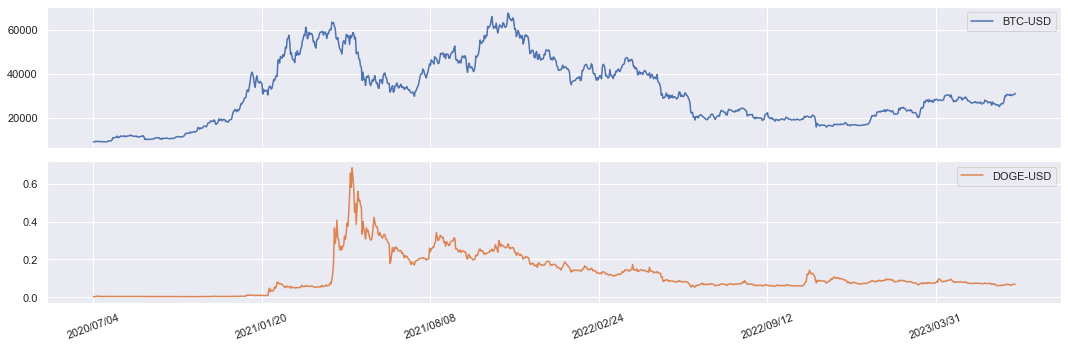

In [ ]:
port.plot(subplots=True, figsize =(15, 5))
plt.xticks(rotation=20)
plt.tight_layout()
plt.show()

## First Difference of Daily Prices of Bitcoin and Dogecoin between 2020 and 2023

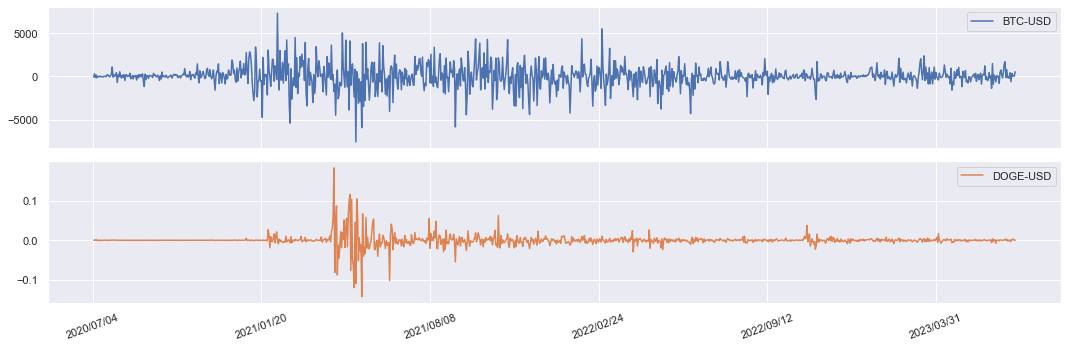

In [ ]:
port_firstdiff=port.diff()
port_firstdiff.plot(subplots=True,figsize=(15, 5))
plt.xticks(rotation=20)
plt.tight_layout()
plt.show()

When we take their first difference, the p-value of the ADF statistics is becomes 5.9056e-14 and 2.6773e-13 respectively therefore, we reject the null hypothesis in favour of the alternative hypothesis and conclude that the first difference of the dogecoin and bitcoin data are stationary or do not have a unit root. See the table below for further details:

### Importing the Data for Dogecoin Prices

[*********************100%***********************]  1 of 1 completed


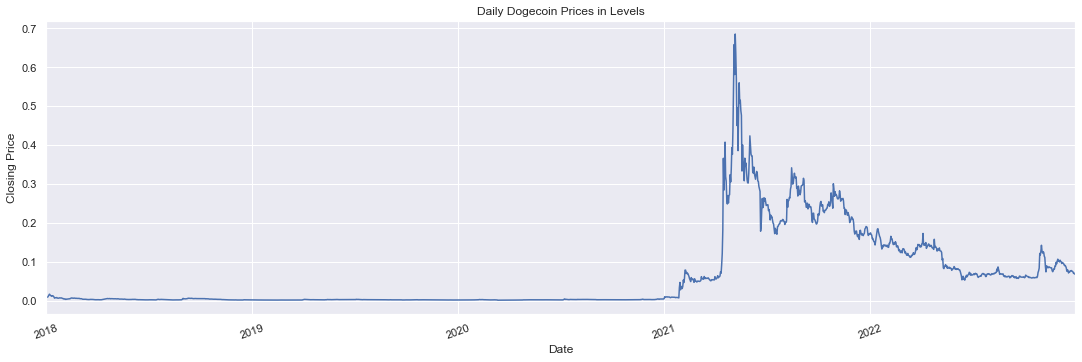

In [ ]:
# Defining the ticker symbol for the S&P 500 index
ticker_symbol_1 = "DOGE-USD"

# Setting the start and end dates for the data
start_date = "2018-01-01"
end_date = "2023-01-01"

# Fetching the historical data for the S&P 500 index
data_1 = yf.download(ticker_symbol_1, start=start_date, end=end_date)

# Extracting the "Close" column from the data
closing_prices_1 = data_1["Close"]

# Plotting the S&P 500 closing prices over time
closing_prices_1.plot(subplots=True, figsize =(15, 5))
plt.xticks(rotation=20)
plt.tight_layout()
plt.title("Daily Dogecoin Prices in Levels")
plt.xlabel("Date")
plt.ylabel("Closing Price")
plt.grid(True)
plt.show()

### Performing the Augmented Dickey Fuller (ADF) Test on Dogecoin Prices in Levels

In [ ]:
from statsmodels.tsa.stattools import adfuller
# Perform the ADF test
result = adfuller(closing_prices_1)

# Extract and print the test statistics
adf_statistic = result[0]
p_value = result[1]
critical_values = result[4]

print(f'ADF Statistic: {adf_statistic}')
print(f'p-value: {p_value}')
print('Critical Values:')
for key, value in critical_values.items():
    print(f'{key}: {value}')

ADF Statistic: -2.495383094487464
p-value: 0.11660171289045307
Critical Values:
1%: -3.4339881389288407
5%: -2.863147035877915
10%: -2.567625533641975


### Importing the Data for Bitcoin Prices

[*********************100%***********************]  1 of 1 completed


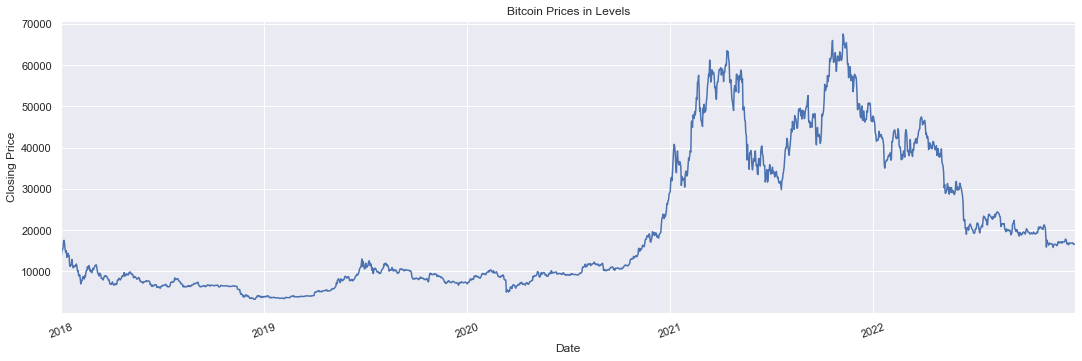

In [ ]:
# Defining the ticker symbol for the S&P 500 index
ticker_symbol_2 = "BTC-USD"

# Setting the start and end dates for the data
start_date = "2018-01-01"
end_date = "2023-01-01"

# Fetching the historical data for the S&P 500 index
data_2 = yf.download(ticker_symbol_2, start=start_date, end=end_date)

# Extracting the "Close" column from the data
closing_prices_2 = data_2["Close"]

# Plotting the S&P 500 closing prices over time
closing_prices_2.plot(subplots=True, figsize =(15, 5))
plt.xticks(rotation=20)
plt.tight_layout()
plt.title("Bitcoin Prices in Levels")
plt.xlabel("Date")
plt.ylabel("Closing Price")
plt.grid(True)
plt.show()

### Performing the Augmented Dickey Fuller (ADF) Test on Bitcoin Prices in Levels

In [ ]:
from statsmodels.tsa.stattools import adfuller
# Perform the ADF test
result = adfuller(closing_prices_2)

# Extract and print the test statistics
adf_statistic = result[0]
p_value = result[1]
critical_values = result[4]

print(f'ADF Statistic: {adf_statistic}')
print(f'p-value: {p_value}')
print('Critical Values:')
for key, value in critical_values.items():
    print(f'{key}: {value}')

ADF Statistic: -1.368090146928366
p-value: 0.5974749358209469
Critical Values:
1%: -3.4339861159726306
5%: -2.863146142843122
10%: -2.5676250581282964


### The plot for the First Difference of Dogecoin prices

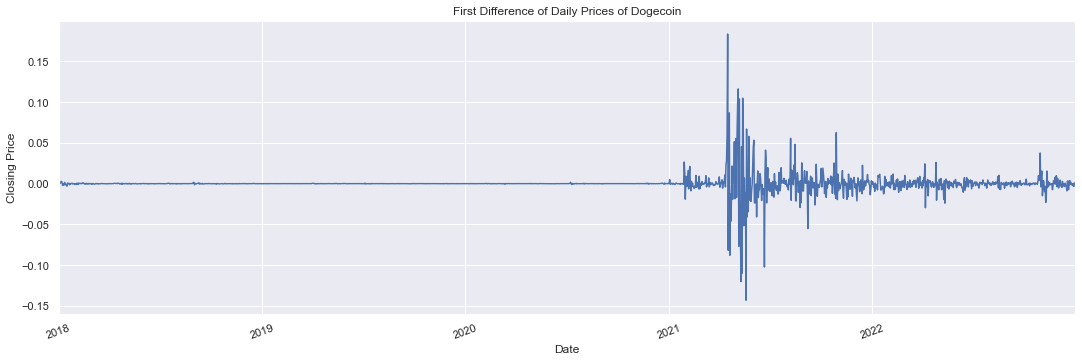

In [ ]:
closing_prices_1_firstdiff=closing_prices_1.diff()
closing_prices_1_firstdiff.plot(subplots=True,figsize=(15, 5))
plt.xticks(rotation=20)
plt.tight_layout()
plt.title("First Difference of Daily Prices of Dogecoin")
plt.xlabel("Date")
plt.ylabel("Closing Price")
plt.grid(True)
plt.show()

### Performing the Augmented Dickey Fuller (ADF) Test on First Difference of Bitcoin prices

In [ ]:
from statsmodels.tsa.stattools import adfuller
# Perform the ADF test
result = adfuller(closing_prices_1_firstdiff.dropna())

# Extract and print the test statistics
adf_statistic = result[0]
p_value = result[1]
critical_values = result[4]

print(f'ADF Statistic: {adf_statistic}')
print(f'p-value: {p_value}')
print('Critical Values:')
for key, value in critical_values.items():
    print(f'{key}: {value}')

ADF Statistic: -8.626647673573986
p-value: 5.905654129249575e-14
Critical Values:
1%: -3.433990164137254
5%: -2.8631479299063405
10%: -2.567626009684832


### The plot for the First Difference of Bitcoin prices

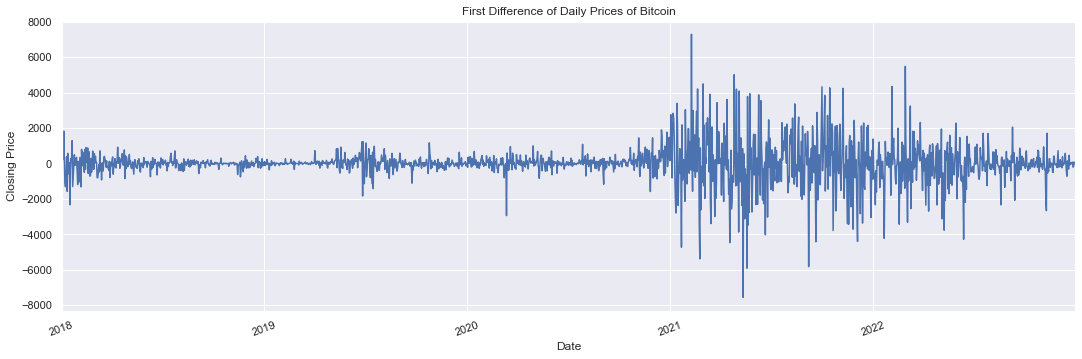

In [ ]:
closing_prices_2_firstdiff=closing_prices_2.diff()
closing_prices_2_firstdiff.plot(subplots=True,figsize=(15, 5))
plt.xticks(rotation=20)
plt.tight_layout()
plt.title("First Difference of Daily Prices of Bitcoin")
plt.xlabel("Date")
plt.ylabel("Closing Price")
plt.grid(True)
plt.show()

### Performing the Augmented Dickey Fuller (ADF) Test on First Difference of Bitcoin Prices

In [ ]:
from statsmodels.tsa.stattools import adfuller
# Perform the ADF test
result = adfuller(closing_prices_2_firstdiff.dropna())

# Extract and print the test statistics
adf_statistic = result[0]
p_value = result[1]
critical_values = result[4]

print(f'ADF Statistic: {adf_statistic}')
print(f'p-value: {p_value}')
print('Critical Values:')
for key, value in critical_values.items():
    print(f'{key}: {value}')

ADF Statistic: -8.370056666580433
p-value: 2.6773097810376015e-13
Critical Values:
1%: -3.4339861159726306
5%: -2.863146142843122
10%: -2.5676250581282964


<p> We proceed to the employing the two-step Engle-Granger test to check for cointegration. First, we estimate the regression model in (2) and obtain the residuals and use the ADF test to test whether this residual is stationary at level form and if it is we then conclude that the variables are cointegrated. The Hypothesis Testing procedure is as follows:
<p> H0: Variables are not cointegrated
<p> H1: Variables are cointegrated


### Engle-Granger cointegration

In [ ]:
# Add a constant to the independent variable for the cointegration test
X = sm.add_constant(closing_prices_2_firstdiff.dropna())

# Fit an OLS model for the cointegration test
model = sm.OLS(closing_prices_1_firstdiff.dropna(), X)
results = model.fit()

# Perform the Engle-Granger cointegration test
eg_test = sm.tsa.stattools.coint(closing_prices_2_firstdiff.dropna(), closing_prices_1_firstdiff.dropna(), trend='c', maxlag=1, autolag=None)
# trend='c' indicates a constant term, maxlag is the maximum lag order to check for cointegration,
# and autolag=None specifies to use the user-specified maxlag value

# Print the test results
print("Engle-Granger Cointegration Test Results:")
print("Test statistic:", eg_test[0])
print("P-value:", eg_test[1])
print("Critical values:", eg_test[2])

Engle-Granger Cointegration Test Results:
Test statistic: -30.472180003344832
P-value: 0.0
Critical values: [-3.90245441 -3.33948189 -3.04677604]


The above results demonstrate that the cryptocurrencies have an equilibrium relationship. The magnitude of the coefficient (-0.0895) represents the speed of adjustment. Therefore, the error correction mechanism suggests that for the daily prices of the cryptocurrencies, deviations from the long-run equilibrium between Dogecoin and Bitcoin is corrected by 8.9% per unit time. The statistical significance of the coefficient strengthens the interpretation that there is a meaningful and significant adjustment process towards equilibrium.

### Error Correction Model

In [ ]:
# Estimate the ECM
model = sm.OLS(closing_prices_1_firstdiff.dropna(), X)
results = model.fit()

# Extract the residuals (error term)
residuals = results.resid

# Create lagged variables
lagged_residuals = residuals.shift(1)  # Use lagged residuals as an independent variable

# Combine the lagged residuals with the original independent variables
X_ecm = pd.concat([X, lagged_residuals], axis=1).dropna()

# Estimate the ECM
model_ecm = sm.OLS(closing_prices_1_firstdiff.dropna()[1:], X_ecm)
results_ecm = model_ecm.fit()

# Print the ECM results
print(results_ecm.summary())

                            OLS Regression Results                            
Dep. Variable:                  Close   R-squared:                       0.149
Model:                            OLS   Adj. R-squared:                  0.148
Method:                 Least Squares   F-statistic:                     158.9
Date:                Tue, 04 Jul 2023   Prob (F-statistic):           2.37e-64
Time:                        10:05:50   Log-Likelihood:                 5584.5
No. Observations:                1824   AIC:                        -1.116e+04
Df Residuals:                    1821   BIC:                        -1.115e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        2.95e-05      0.000      0.111      0.9

### 1.4	Diagram
<p> Every econometric modelling makes some basic assumptions about the underlying process that generates the data, valid conclusions can only be drawn from the model if it approximates the behaviour of the underlying data generating process. To diagnose the procedure for modeling non-stationarity and finding an equilibrium, we provide the modus operandi in the main paper.
<p>The diagram conceptualizes how the process of modeling non-stationarity and finding an equilibrium works. Stage 1 entails checking for the stationarity of cryptocurrencies using the Augmented Dickey Fuller (ADF) test. If the variables are stationary in levels or of order 0, that is I (0), we proceed to fitting a regression model accordingly. However, if the variables are stationary after employing the first difference transformation, then we say they are integrated of order 1, that is I(1), after which we proceed to Stage 2. But, if all the variables are not stationary of order I(1), we can proceed to employing the second difference transformation, that is, I(2) until we attain stationarity. Therefore, we can have situations that go as far taking the fifth difference transformation, that is I(5), to achieve stationarity.
<p>In our case, we find that the cryptocurrencies are stationary after first difference. The next step is to find the existence of a long run relationship. This is referred to as ascertaining if the cryptocurrencies are cointegrated. We will employ two approaches of checking for cointegration namely: (i) The Augmented Engle-Granger test and (ii) The Johanssen test.
<p>The Engle-Granger test is popular for testing cointegration between two variables and involves a two-step procedure. The steps entail estimating the regression model for the cryptocurrencies in equation (4) and obtaining the residuals for the regression model. After that, the ADF test is used to check whether these residuals are stationary at level form. If they are stationary in level form, we then conclude that the variables are cointegrated (Engle and Granger, 1987). In most cases, if two variables that are I(1), we employ the Engle-Granger cointegration procedure. The Engle-Granger cointegration procedure is complemented by the error correction model (ECM), which is used to analyze both the short-term dynamics and the long-term equilibrium into the analysis. The ECM incorporates an error correction term, which captures the speed at which the system corrects deviations from the equilibrium. If the prices of the two cryptocurrencies diverge from their long-term equilibrium, the error correction term will exert a force to bring them back to the equilibrium. The magnitude and significance of the error correction term provide insights into the speed and strength of the adjustment process towards the equilibrium.
<p>It sufficient to note that the Engle-Granger method for cointegration is designed for two-variable models and therefore may not be appropriate for models with multiple variables. We rely on the Johansen test for multivariate case with multiple variables (more than two). Say for example, we introduce another cryptocurrency known as Ethereum (ETH-USD) to the existing framework, we would have to turn to the Johansen cointegration test procedure to establish if the cryptocurrencies are cointegrated. At stage 3, one aspect of the Johansen cointegration test is to select an optimum lag in accordance with the Akaike’s Information Criterion (AIC). The other aspect is to determine the number of cointegrating rank of Vector Error Correction (VEC) in the model. This is done using the trace test and the maximum eigen-value method (Johansen, 1991). If cointegration is not found, the researcher will proceed to Stage 3a, otherwise the researcher will proceed to Stage 3b. Stages 3a and 3b are essentially the test for causality. A Vector Error Correction (VEC) Model will be invoked if variables are cointegrated otherwise, a Vector Autoregressive (VAR) Model will be invoked.


### 1.6	Damage
<p> We highlight in section 1.4 that the Engle Granger method is not suitable for multivariate case with multiple variables (more than two). This is because the Engle-Granger method is limited to testing cointegration between two variables (bivariate analysis). It cannot handle cases with more than two variables (Gujarati, 2009). In contrast, the Johansen test allows for the analysis of cointegration among multiple variables (multivariate analysis). In many real-world scenarios, economic relationships involve more than two variables. The Johansen (1991) procedure is the maximum likelihood for the finite-order vector autoregressions (VARS) and is easily calculated for systems that can capture the complex interrelationships among multiple variables as well as identify multiple cointegrating vectors if they exist. It is therefore generally considered more robust and efficient than the Engle-Granger test, particularly when dealing with larger sets of variables.


### 1.7 Directions
To mirror a real-world scenario, we shall introduce as third cryptocurrency, say Ethereum (ETH-USD). By so doing, we certainly must turn to the Johansen Cointegration procedure to establish a long-term relationship between the cryptocurrencies. See the following procedure for the Johansen cointegration test:
<p> 1.7.1	Lag Selection Procedure
<p>The initial step in the Johansen Cointegration procedure involves selecting an appropriate lag length, as this choice significantly affects the outcome (Johansen, 1991; Johansen and Juselius, 1990). To determine the lag length, we utilize the Akaike Information Criterion (AIC), a commonly used criterion for lag selection in single-variable distributed-lag models. The AIC is particularly suitable for small sample sizes and has performed well in Monte Carlo studies (Kennedy, 2003). However, it is important to note that different criteria may not always agree on the optimal lag length. In such cases, some level of judgment may be necessary. The key consideration is to ensure that the chosen lag length results in residuals that resemble white noise, as reliable inferences can only be drawn if this condition is met. Therefore, if needed, additional lags are incorporated to achieve practical usefulness in estimation (Toda and Yamamoto, 1995).

Adding more lags, however, comes with drawbacks. A high-order VAR or lag length can lead to a loss of degrees of freedom and subsequently an upward bias in the test statistic, which may raise concerns about the reliability of parameter estimates. Nonetheless, in practice, researchers prioritize obtaining a white noise error term over the loss of degrees of freedom. Another approach to selecting an appropriate lag length is to utilize standard Wald test statistics to examine whether the coefficients at each lag are all zero (Tiwari, 2011).
  
<p> 1.7.2	Trace/Maximum Eigen Value Statistic for Johansen Cointegration Test
<p> Once we have obtained a VAR model with the suitable number of lags and white noise residuals, we can move on to determine the number of cointegrating vectors, denoted by r0, using the Trace and Maximum Eigenvalue statistics. The Trace test and Maximum Eigenvalue test statistics are defined by equations (3) and (4) respectively, as described in the work of Johansen and Juselius (1990).

<p> Using a VAR (Vector Autoregressive) model, we conduct Granger causality tests to determine whether lagged values of one variable can predict another variable, following the approach outlined by Gujarati and Porter (2009). These causality tests are applicable and reliable when the variables under consideration are not cointegrated, as established by Granger (1969). In cases where the variables are not cointegrated, the causality tests should be conducted using differenced data, as suggested by Chang (2010). In our specific case, the employ the VAR model as specified in the main paper.
<p> The criteria for causality in this context are as follows: the hypothesis test would be carried out using the chi-square statistics. If the values of the α coefficients are significant whilst the values of β and γ coefficients are not, then the prices of Dogecoin and Ethereum granger causes Bitcoin prices. Similarly, if the values of the β coefficients are significant whilst the values of α and γ coefficients are not, then prices of Bitcoin and Ethereum granger causes Dogecoin prices. Accordingly, if the values of the γ coefficients are significant whilst the values of α and β coefficients are not, then the prices of Bitcoin and Dogecoin granger causes Ethereum. Furthermore, the author’s choice of model under the “Cointegration Test Specification” in Python was the model (4) option, which allows for an intercept and no trend in the Cointegrating Equation (CE) and test VAR. This was because at the first difference when we found stationarity for all the variables in this paper, we allowed for an intercept and detrended all the variables of interest.

### Importing the Data for Ethereum Prices

[*********************100%***********************]  1 of 1 completed


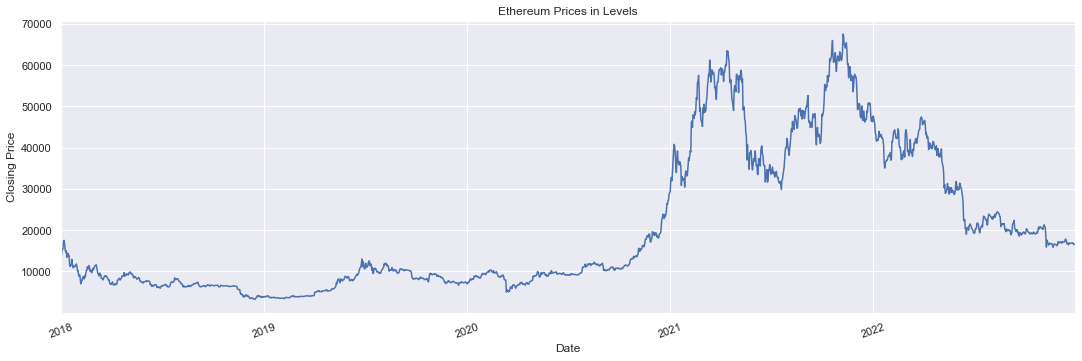

In [ ]:
# Defining the ticker symbol for the S&P 500 index
ticker_symbol ="ETH-USD"

# Setting the start and end dates for the data
start_date = "2018-01-01"
end_date = "2023-01-01"

# Fetching the historical data for the S&P 500 index
data = yf.download(ticker_symbol, start=start_date, end=end_date)

# Extracting the "Close" column from the data
closing_prices_3 = data["Close"]

# Plotting the S&P 500 closing prices over time
closing_prices_2.plot(subplots=True, figsize =(15, 5))
plt.xticks(rotation=20)
plt.tight_layout()
plt.title("Ethereum Prices in Levels")
plt.xlabel("Date")
plt.ylabel("Closing Price")
plt.grid(True)
plt.show()

### The plot for the First Difference of Ethereum prices

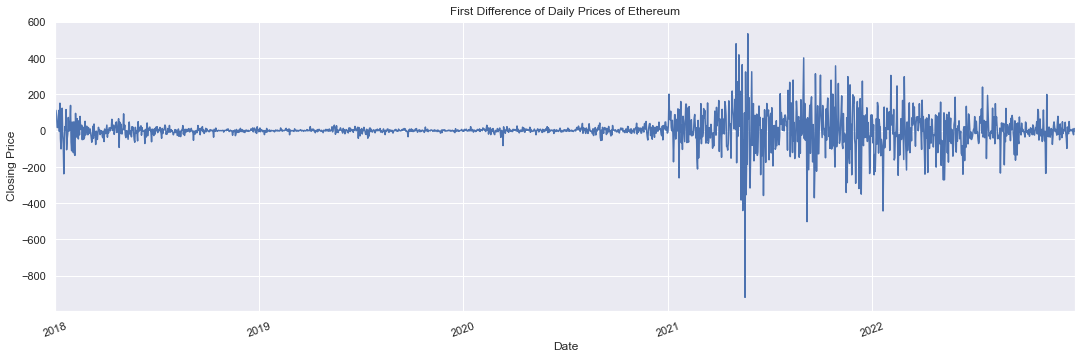

In [ ]:
closing_prices_3_firstdiff=closing_prices_3.diff()
closing_prices_3_firstdiff.plot(subplots=True,figsize=(15, 5))
plt.xticks(rotation=20)
plt.tight_layout()
plt.title("First Difference of Daily Prices of Ethereum")
plt.xlabel("Date")
plt.ylabel("Closing Price")
plt.grid(True)
plt.show()

### Performing the Augmented Dickey Fuller (ADF) Test on Ethereum Prices in Levels

In [ ]:
from statsmodels.tsa.stattools import adfuller
# Perform the ADF test
result = adfuller(closing_prices_3.dropna())

# Extract and print the test statistics
adf_statistic = result[0]
p_value = result[1]
critical_values = result[4]

print(f'ADF Statistic: {adf_statistic}')
print(f'p-value: {p_value}')
print('Critical Values:')
for key, value in critical_values.items():
    print(f'{key}: {value}')

ADF Statistic: -1.3247721050452514
p-value: 0.6177642327155404
Critical Values:
1%: -3.433972018026501
5%: -2.8631399192826676
10%: -2.5676217442756872


### Performing the Augmented Dickey Fuller (ADF) Test on First Difference of Ethereum Prices

In [ ]:
from statsmodels.tsa.stattools import adfuller
# Perform the ADF test
result = adfuller(closing_prices_3_firstdiff.dropna())

# Extract and print the test statistics
adf_statistic = result[0]
p_value = result[1]
critical_values = result[4]

print(f'ADF Statistic: {adf_statistic}')
print(f'p-value: {p_value}')
print('Critical Values:')
for key, value in critical_values.items():
    print(f'{key}: {value}')

ADF Statistic: -10.65862854423805
p-value: 4.466528360392233e-19
Critical Values:
1%: -3.433972018026501
5%: -2.8631399192826676
10%: -2.5676217442756872


### Importing all the Cryptocurrencies as a Vector

In [ ]:
def stock_Data(ls,start_date,end_date):
    data=pd.DataFrame()
    for i in ls:
        st=yf.download(i, start=start_date, end=end_date)["Adj Close"]
        st=st.reindex(st.index.strftime('%Y/%m/%d')).rename(i)
        data=pd.concat([data,st],axis=1)
    return data

In [ ]:
# Define the stocks and the time period for which you want to pull data
stock = ["BTC-USD","DOGE-USD","ETH-USD"]
end_date = date.today()
start_date = end_date - timedelta(days=365.25*3)

In [ ]:
df=stock_Data(stock,start_date,end_date)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [ ]:
portfolio=df.dropna(axis = 0, how = 'any')
portfolio

,BTC-USD,DOGE-USD,ETH-USD
2020/07/04,9132.488281,0.002309,229.074112
2020/07/05,9073.942383,0.002309,227.664597
2020/07/06,9375.474609,0.002616,241.510223
2020/07/07,9252.277344,0.003090,239.075531
2020/07/08,9428.333008,0.004750,246.670013
...,...,...,...
2023/06/29,30445.351562,0.063407,1852.227295
2023/06/30,30477.251953,0.066479,1933.188965
2023/07/01,30590.078125,0.068478,1924.565918
2023/07/02,30620.769531,0.068038,1937.438354


### Lag Selection for Johansen Cointegration Model

In [ ]:
# Specify the range of lag orders to test
min_lag = 1
max_lag =3

# Initialize variables for best lag order and minimum AIC
best_order = 0
min_aic = float('inf')

# Iterate over lag orders and select the best one based on AIC
for lag_order in range(min_lag, max_lag + 1):
    model = VAR(portfolio)
    results = model.fit(maxlags=lag_order)
    aic = results.aic

    print("Lag Order:", lag_order)
    print("AIC:", aic)

    if aic < min_aic:
        min_aic = aic
        best_order = lag_order

# Print the lag order selection results
print("Best Lag Order:", best_order)
print("Minimum AIC:", min_aic)

Lag Order: 1
AIC: 14.12992751941414
Lag Order: 2
AIC: 14.11181659262215
Lag Order: 3
AIC: 14.098160684312479
Best Lag Order: 3
Minimum AIC: 14.098160684312479


C:\Users\Ekene\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\Ekene\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\Ekene\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


### Johansen Cointegration Test

In [ ]:
# Specify the lag order for cointegration test
lag_order = 3

# Create the lagged variables
lagged_variables = portfolio.shift(lag_order).dropna()

# Perform the Johansen cointegration test
johansen_results = coint_johansen(lagged_variables, det_order=0, k_ar_diff=lag_order-1)  # Adjust parameters as needed

# Print the test results
print("Johansen Cointegration Test Results:")
print("Eigenvalues:", johansen_results.eig)
print("Eigenvalue Test Statistic:", johansen_results.lr1)
print("Critical Values (90%, 95%, 99%):", johansen_results.cvt)
print("Trace Statistic:", johansen_results.lr2)
print("Critical Values (90%, 95%, 99%):", johansen_results.cvm)

Johansen Cointegration Test Results:
Eigenvalues: [0.02505165 0.01494544 0.00483506]
Eigenvalue Test Statistic: [49.30537024 21.67659033  5.27815413]
Critical Values (90%, 95%, 99%): [[27.0669 29.7961 35.4628]
 [13.4294 15.4943 19.9349]
 [ 2.7055  3.8415  6.6349]]
Trace Statistic: [27.62877991 16.3984362   5.27815413]
Critical Values (90%, 95%, 99%): [[18.8928 21.1314 25.865 ]
 [12.2971 14.2639 18.52  ]
 [ 2.7055  3.8415  6.6349]]


### Number of Cointegrating Rank of VECM

In [ ]:
# Get the number of cointegrating ranks
threshold = 0.05  # Set your desired threshold value
num_ranks = sum(johansen_results.eig > threshold)
print("Number of Cointegrating Ranks:", num_ranks)


Number of Cointegrating Ranks: 0


### 1.8	Deployment
<p> The major change we made to our model is the introduction of another cryptocurrency known as Ethereum (ETH-USD). For completeness, we confirm that the prices of Ethereum are stationary at first difference.
<p> Following the results from the Python script, the optimal lag length was found to be 4 with a minimum AIC of 13.946 approximately.  Based on Trace/Maximum Eigen Value Statistic for Johansen Cointegration Test analysis in the Python Script, we do not reject the null hypothesis and that means that there is no cointegrating rank of VEC for the cryptocurrencies. Since the Johansen cointegration test procedure does not show a long run relationship, a VAR model will be used to estimate the Granger-causality tests for cryptocurrencies.

### Implementing the VAR model

In [ ]:
# Specify the lag order for the VAR model
lag_order = 3

# Fit the VAR model
model = VAR(portfolio)
results = model.fit(lag_order)

# Print the VAR model summary
print(results.summary())

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Tue, 04, Jul, 2023
Time:                     10:05:51
--------------------------------------------------------------------
No. of Equations:         3.00000    BIC:                    14.2354
Nobs:                     1092.00    HQIC:                   14.1501
Log likelihood:          -12316.0    FPE:                1.32664e+06
AIC:                      14.0982    Det(Omega_mle):     1.29085e+06
--------------------------------------------------------------------
Results for equation BTC-USD
                 coefficient       std. error           t-stat            prob
------------------------------------------------------------------------------
const             131.718703        94.042219            1.401           0.161
L1.BTC-USD          1.071612         0.048302           22.186           0.000
L1.DOGE-USD       421.976780      2773.050423            0.152    

C:\Users\Ekene\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


### Carrying out the VAR Granger Causality Test

In [ ]:
# Specify the lag order for the VAR model
lag_order = 3

# Fit the VAR model
model = VAR(portfolio)
results = model.fit(lag_order)

# Perform the Granger causality test
causality_test = results.test_causality('DOGE-USD', ['BTC-USD'], kind='f')

# Print the causality test results
print("Granger Causality Test Results:")
print(causality_test)

Granger Causality Test Results:
<statsmodels.tsa.vector_ar.hypothesis_test_results.CausalityTestResults object. H_0: BTC-USD does not Granger-cause DOGE-USD: reject at 5% significance level. Test statistic: 5.899, critical value: 2.608>, p-value: 0.001>


C:\Users\Ekene\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


<p> The results above suggest that Bitcoin prices granger-causes Ethereum prices.  However, we do not find any evidence a feedback or bidirectional granger causality between the prices of Bitcoin and Ethereum. Similarly, we did not find any evidence of causality between Bitcoin and Dogecoin prices as well as for Dogecoin and Ethereum prices.  